In [1]:
##Estimación de indicadores de seguridad
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\Rtmpug4eJ6\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\Rtmpug4eJ6\remotes84b818135aff\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [3]:
## leer excel
datos <- openxlsx::read.xlsx("gob_digital/indica_adip.xlsx")
datos

,year,wifi,wifi_funciona,simplifica,avance_regul
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,87.22000,74.40000,42.67000,60.70000
2,2025,87.46914,75.69869,45.17913,63.46028
3,2026,87.71899,77.02004,47.83580,66.34609
4,2027,87.96955,78.36447,50.64870,69.36312
5,2028,88.22083,79.73236,53.62700,72.51736
6,2029,88.47283,81.12412,56.78043,75.81503
7,2030,88.72555,82.54018,60.11930,79.26265
8,2031,88.97898,83.98096,63.65450,82.86706
9,2032,89.23315,85.44689,67.39759,86.63537


In [7]:
wifi<-datos%>%
select(year,wifi)%>%
intervals("wifi", margen = 0.004, año_base = 2024)%>%
#Sustituir por 100 si son superiores a 100
mutate(superior = ifelse(superior > 100, 100, superior))
wifi

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,87.22000,87.22000,87.22000
2,2025,87.46914,87.81901,87.12066
3,2026,87.71899,88.42214,87.02142
4,2027,87.96955,89.02941,86.92231
5,2028,88.22083,89.64086,86.82330
6,2029,88.47283,90.25650,86.72441
7,2030,88.72555,90.87637,86.62563
8,2031,88.97898,91.50049,86.52696
9,2032,89.23315,92.12891,86.42841


In [9]:
wifi_funciona<-datos%>%
select(year,wifi_funciona)%>%
intervals("wifi_funciona", margen = 0.004, año_base = 2024)%>%
#Sustituir por 100 si son superiores a 100
mutate(superior = ifelse(superior > 100, 100, superior))
wifi_funciona

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,74.40000,74.40000,74.40000
2,2025,75.69869,76.00148,75.39710
3,2026,77.02004,77.63744,76.40756
4,2027,78.36447,79.30861,77.43157
5,2028,79.73236,81.01575,78.46929
6,2029,81.12412,82.75964,79.52093
7,2030,82.54018,84.54106,80.58666
8,2031,83.98096,86.36084,81.66667
9,2032,85.44689,88.21978,82.76116


In [10]:
simplifica<-datos%>%
select(year,simplifica)%>%
intervals("simplifica", margen = 0.004, año_base = 2024)%>%
#Sustituir por 100 si son superiores a 100
mutate(superior = ifelse(superior > 100, 100, superior))
simplifica

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,42.67000,42.67000,42.67000
2,2025,45.17913,45.35985,44.99913
3,2026,47.83580,48.21925,47.45540
4,2027,50.64870,51.25892,50.04574
5,2028,53.62700,54.49019,52.77748
6,2029,56.78043,57.92516,55.65833
7,2030,60.11930,61.57667,58.69642
8,2031,63.65450,65.45836,61.90036
9,2032,67.39759,69.58475,65.27917


In [44]:
avance_regul<-datos%>%
select(year,avance_regul)%>%
intervals("avance_regul", margen = 0.0009, año_base = 2024)%>%
#Sustituir por 100 si son superiores a 100
mutate(superior = ifelse(superior > 100, 100, superior))
avance_regul

,year,estimado,superior,inferior
,<dbl>,<dbl>,<dbl>,<dbl>
1,2024,60.70000,60.70000,60.70000
2,2025,63.46028,63.51740,63.40322
3,2026,66.34609,66.46557,66.22683
4,2027,69.36312,69.55057,69.17618
5,2028,72.51736,72.77877,72.25688
6,2029,75.81503,76.15681,75.47478
7,2030,79.26265,79.69164,78.83598
8,2031,82.86706,83.39053,82.34687
9,2032,86.63537,87.26111,86.01411


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


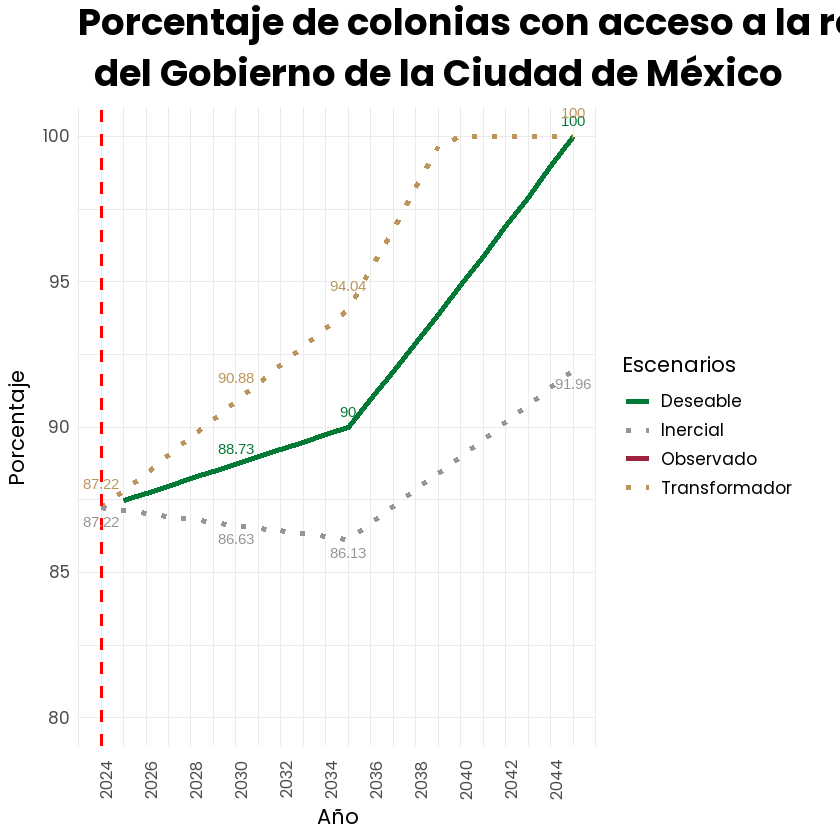

In [24]:
grafica_bonita(
  data = wifi,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de colonias con acceso a la red WiFi gratuita
  del Gobierno de la Ciudad de México",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 80
)

ggsave("gob_digital/wifi_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


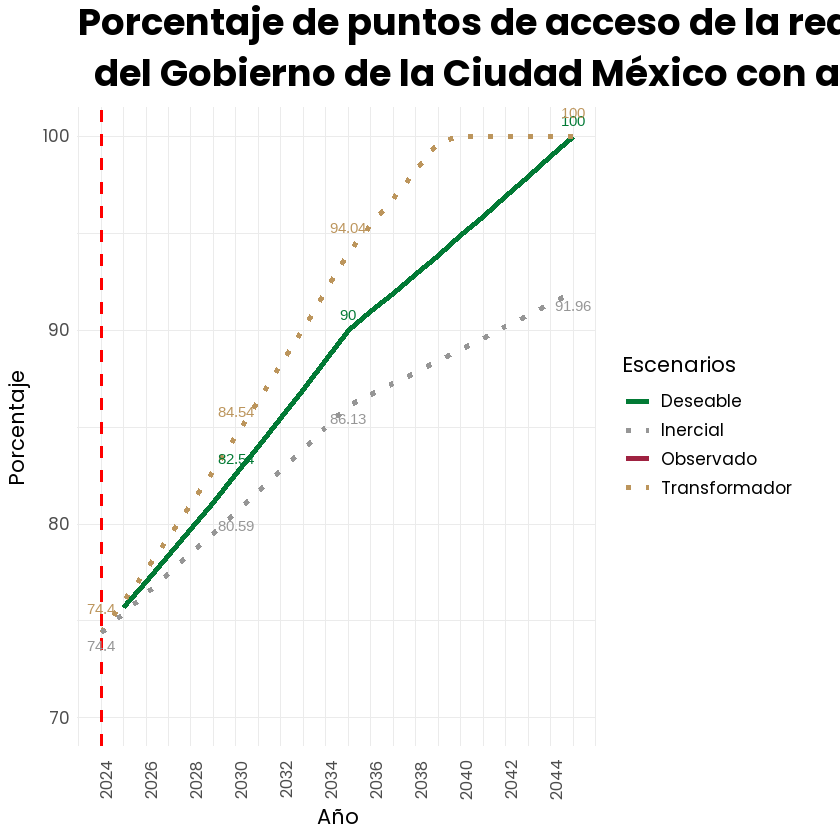

In [26]:
grafica_bonita(
  data = wifi_funciona,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de puntos de acceso de la red WiFi gratuita
  del Gobierno de la Ciudad México con acceso a internet",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 70
)

ggsave("gob_digital/wifi_funciona_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


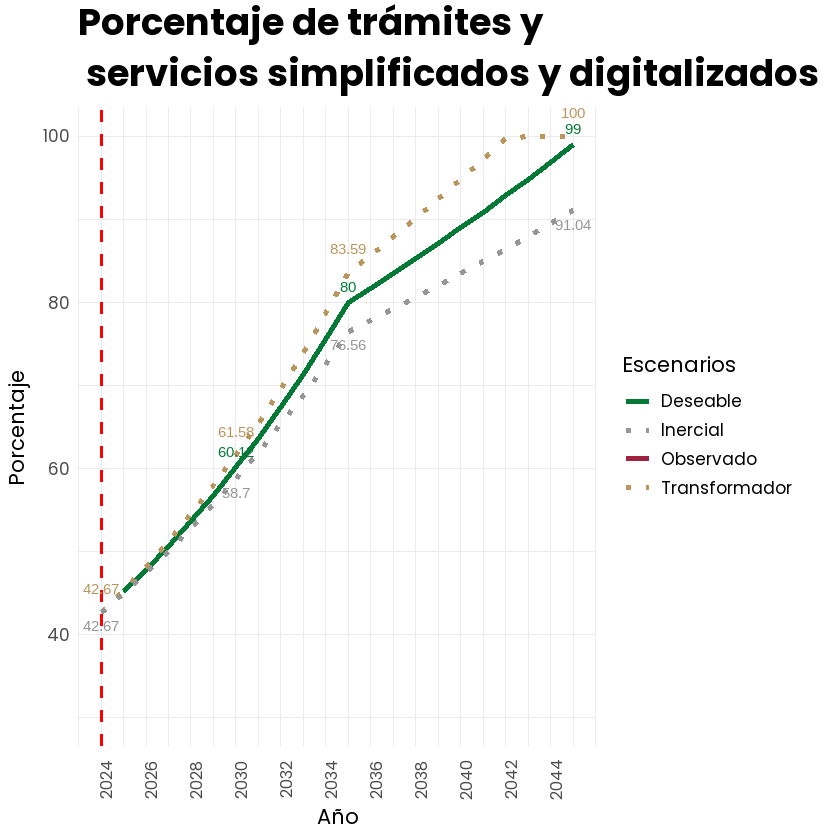

In [31]:
grafica_bonita(
  data = simplifica,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de trámites y 
 servicios simplificados y digitalizados",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 30
)

ggsave("gob_digital/simplifica_tram_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


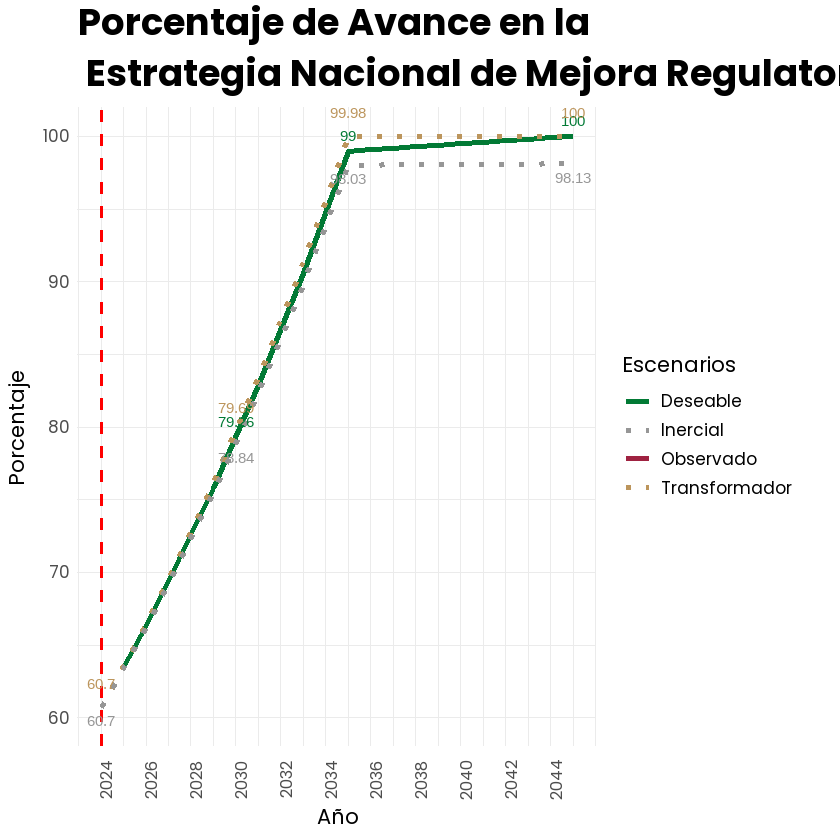

In [45]:
grafica_bonita(
  data = avance_regul,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de Avance en la
 Estrategia Nacional de Mejora Regulatoria",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 60
)

ggsave("gob_digital/avance_regul_estimada.png", width = 12, height = 10, dpi = 100, bg = "white")